# Flower Image classification

Flower Image classification using **Tensorflow**

This tutorial contains below sections:
1. Examining and understanding the data 
2. Build an input pipeline 
3. Build the model
4. Train the model 
5. Test the model 
6. Improve the model and repeat the process 

Data: `https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz`

About Dataset: 
- About 3700 photos of flowers are used. Dataset contain 5 sub directory one per class 
- Flower class - Daisy / dandelion / roses / sunflowers / tulips

In [1]:
# importing the important library 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

## Loading the dataset

In [2]:
import pathlib

data_dir = "./datasets/flower_photos/"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [3]:
# Finding the counts of images 
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [5]:
# importing PIL (python Imaging Library ) module is open source library for opening, manipulating and saving images 
import PIL 
PIL.__version__

'7.2.0'

### Viewing the image data 

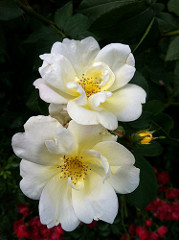

In [6]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

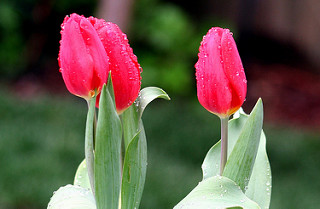

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Creating datasets using images 

In [8]:
# image parameters
batch_size = 32
img_height = 180
img_width = 180

In [10]:
# Loading the images from disk to tf.data.Dataset using tf.keras.preprocessing.image_dataset_from_directory()
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed= 42, 
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed= 42, 
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
train_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [13]:
# setting the class names 
class_names = train_dataset.class_names

### Visualizing the data

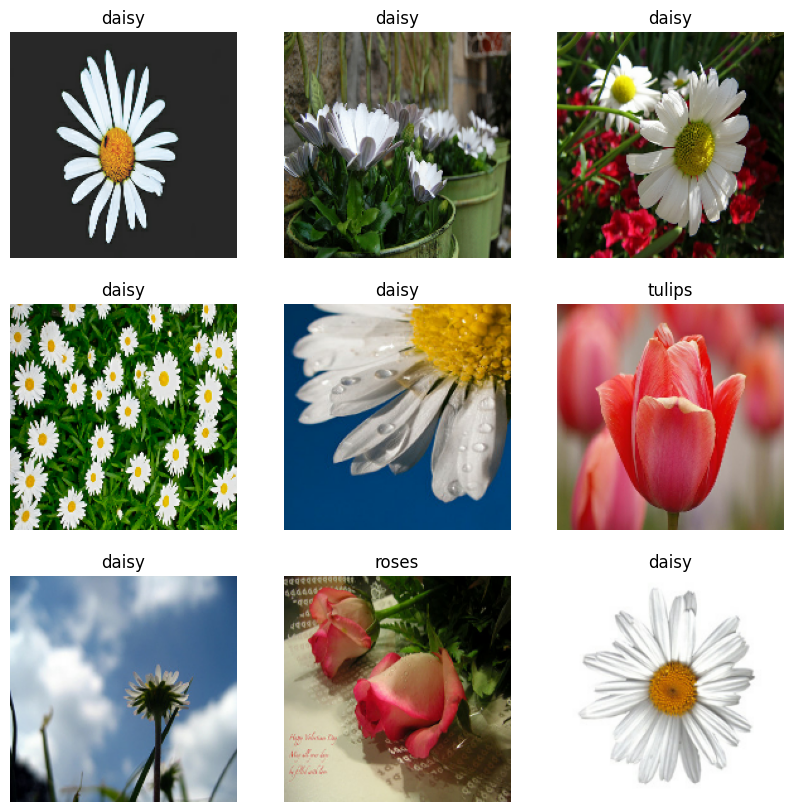

In [16]:
plt.figure(figsize=(10, 10))
for image, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
plt.show()

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Standardize the data

In [18]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


### Create the model 

In [21]:
# create the model 
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

### Compile the model

In [22]:
# compile the model 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer="adam",
             metrics=["accuracy"])

In [23]:
# Summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [24]:
# Fitting the model 
history = model.fit(train_dataset,
                   validation_data=val_dataset, 
                   epochs=10)

Epoch 1/10
92/92 [==============================] - 79s 827ms/step - loss: 1.4594 - accuracy: 0.3716 - val_loss: 1.1241 - val_accuracy: 0.5150
Epoch 2/10
92/92 [==============================] - 66s 721ms/step - loss: 1.0588 - accuracy: 0.5661 - val_loss: 1.0256 - val_accuracy: 0.5681
Epoch 3/10
92/92 [==============================] - 69s 755ms/step - loss: 0.8992 - accuracy: 0.6533 - val_loss: 1.0597 - val_accuracy: 0.5790
Epoch 4/10
92/92 [==============================] - 64s 700ms/step - loss: 0.7391 - accuracy: 0.7265 - val_loss: 1.1294 - val_accuracy: 0.5708
Epoch 5/10
92/92 [==============================] - 69s 755ms/step - loss: 0.5584 - accuracy: 0.7967 - val_loss: 1.0463 - val_accuracy: 0.6281
Epoch 6/10
92/92 [==============================] - 73s 796ms/step - loss: 0.4084 - accuracy: 0.8614 - val_loss: 1.2276 - val_accuracy: 0.6063
Epoch 7/10
92/92 [==============================] - 72s 783ms/step - loss: 0.2494 - accuracy: 0.9213 - val_loss: 1.2809 - val_accuracy: 0.6376

### Visualize training result

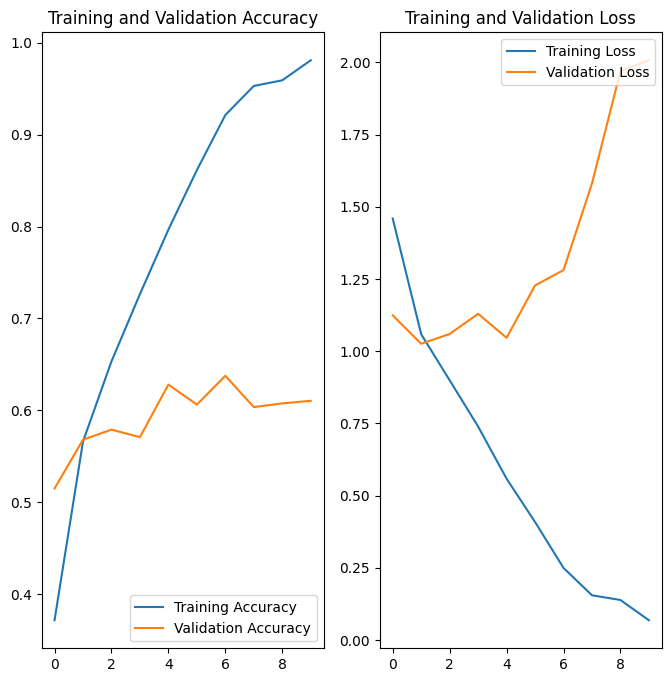

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Overfitting

In the above plot we observe that training accuracy is increasingly linearity over time, where as validation accuracy stalls around 60%. Even the difference is there between training and validation accuracy - **Overfitting**

**Note:** - Overfitting occurs when there a small number of training examples. 

**Data augmentation:** - used for generating additional training data from exisiting examples  by augmenting them using random transformations that yield believable-looking images.

**will implement data augmentation using the layers from tf.keras.layers.experimental.preprocessing**

In [27]:
# data agumentation implementation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                         input_shape=(img_height, 
                                                         img_width,
                                                         3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ])

###  visualize what a few augmented examples look like 

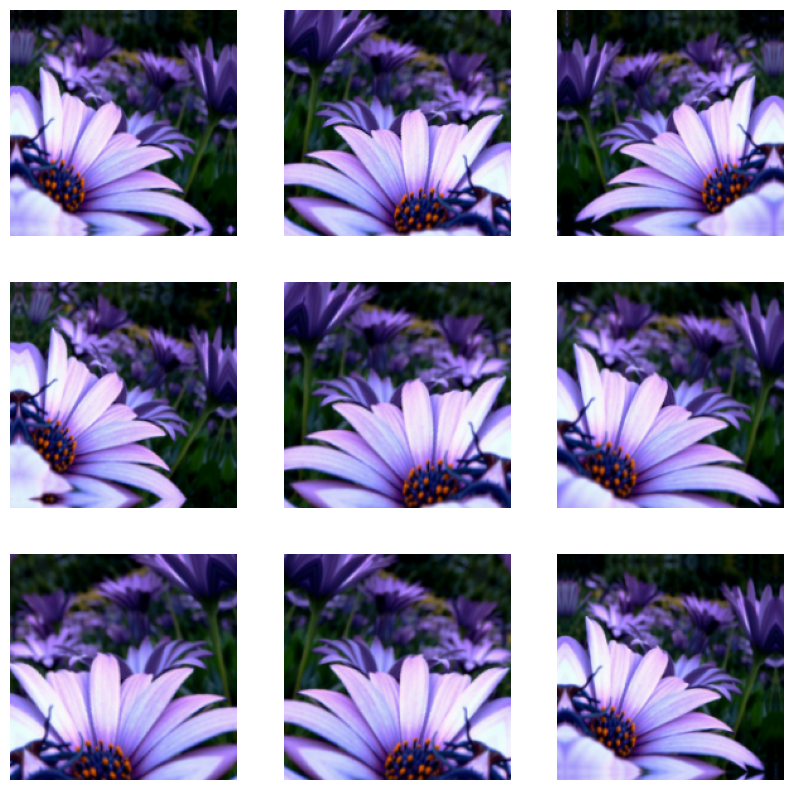

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
        
plt.show()

### Dropout

Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.

In [35]:
# set the random seed
tf.random.set_seed(42)
# create model
model2 = tf.keras.Sequential([
      data_augmentation,
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
      tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(5)
])

In [36]:
# compile the model 
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
# get model summary
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [38]:
# fitting the model 
history2 = model2.fit(train_dataset,
          validation_data=val_dataset, 
          epochs=15)

Epoch 1/15
92/92 [==============================] - 78s 836ms/step - loss: 1.3046 - accuracy: 0.4343 - val_loss: 1.1262 - val_accuracy: 0.5422
Epoch 2/15
92/92 [==============================] - 74s 802ms/step - loss: 1.0238 - accuracy: 0.5892 - val_loss: 0.9926 - val_accuracy: 0.6335
Epoch 3/15
92/92 [==============================] - 75s 819ms/step - loss: 0.9013 - accuracy: 0.6509 - val_loss: 0.8551 - val_accuracy: 0.6757
Epoch 4/15
92/92 [==============================] - 77s 837ms/step - loss: 0.8313 - accuracy: 0.6744 - val_loss: 0.8880 - val_accuracy: 0.6744
Epoch 5/15
92/92 [==============================] - 77s 836ms/step - loss: 0.7725 - accuracy: 0.7050 - val_loss: 0.8554 - val_accuracy: 0.6989
Epoch 6/15
92/92 [==============================] - 76s 829ms/step - loss: 0.7333 - accuracy: 0.7166 - val_loss: 0.8495 - val_accuracy: 0.6866
Epoch 7/15
92/92 [==============================] - 74s 810ms/step - loss: 0.7089 - accuracy: 0.7251 - val_loss: 0.7662 - val_accuracy: 0.7112

### Visualizing training results 

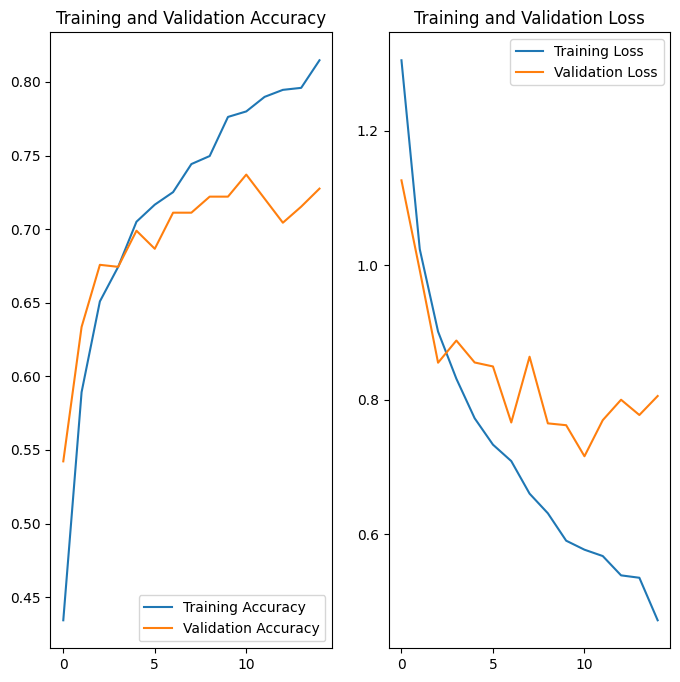

In [40]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on new data 